In [1]:
import numpy as np
import time
import generalized_genSim_shorten_time_HMM as ggsdHMM
import numpy as np
import matplotlib.pyplot as plt
#import matplotlib.colors as colors
#import matplotlib.cm as cmx
from scipy import optimize, stats
import bluepyopt as bpop
import bluepyopt.deapext.algorithms as algo
import vclamp_evaluator_HMM as vcl_ev
import pickle
import time
from deap import tools
#from deap import base, creator
import multiprocessing
#import eval_helper as eh
#import scoring_functions_relative as sf
#import curve_fitting as cf

In [2]:
evaluator = vcl_ev.Vclamp_evaluator_HMM('./params_na12mut8st.csv', 'K1260E', 'na12mut8st', objective_names=['inact', 'act', 'recov'])

/global/u1/m/mikelam/vclamp/curve_fitting.py:27: RuntimeWarning: overflow encountered in exp
  return y0 + span_fast * (1 - np.exp(-k_fast * x)) + span_slow * (1 - np.exp(-k_slow * x))


In [2]:
evaluator = vcl_ev.Vclamp_evaluator_HMM('./params_na12mut8st.csv', 'A427D', 'na12mut8st', objective_names=['v_half_act', 'gv_slope', 'v_half_ssi', 'ssi_slope', 'percent_fast'])

/global/u1/m/mikelam/vclamp/curve_fitting.py:27: RuntimeWarning: overflow encountered in exp
  return y0 + span_fast * (1 - np.exp(-k_fast * x)) + span_slow * (1 - np.exp(-k_slow * x))


In [3]:
gen_counter = 0
best_indvs = []
cp_freq = 1
old_update = algo._update_history_and_hof
def my_update(halloffame, history, population):
    global gen_counter,cp_freq
    if halloffame is not None:
        halloffame.update(population)
    
    if halloffame:
        best_indvs.append(halloffame[0])
    gen_counter = gen_counter+1
    print("Current generation: ", gen_counter)
    if gen_counter%cp_freq == 0:
        fn = '.pkl'
        save_logs(fn,best_indvs,population)

def my_record_stats(stats, logbook, gen, population, invalid_count):
    '''Update the statistics with the new population'''
    record = stats.compile(population) if stats is not None else {}
    logbook.record(gen=gen, nevals=invalid_count, **record)
    print('log: \n', logbook, '\n')
    output = open("log.pkl", 'wb')
    pickle.dump(logbook, output)
    output.close()

def save_logs(fn, best_indvs, hof):
    output = open("indv"+fn, 'wb')
    pickle.dump(best_indvs, output)
    output.close()
    output = open("hof"+fn, 'wb')
    pickle.dump(hof, output)


In [4]:
#hof = tools.HallOfFame(1, similar=np.array_equal)
hof = tools.ParetoFront()
algo._update_history_and_hof = my_update
algo._record_stats = my_record_stats
pool = multiprocessing.Pool(processes=64)
deap_opt = bpop.optimisations.DEAPOptimisation(evaluator, offspring_size=100, hof = hof, map_function=pool.map)
#deap_opt = bpop.optimisations.DEAPOptimisation(evaluator, offspring_size=5, hof = hof)
cp_file = './cp.pkl'

/global/u1/m/mikelam/vclamp/curve_fitting.py:17: RuntimeWarning: overflow encountered in exp
  return bottom +  ((top - bottom) / (1.0 + np.exp((v_half - x)/slope)))
/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time_HMM.py:699: RuntimeWarning: invalid value encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)
/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:1562: RuntimeWarning: invalid value encountered in sqrt
  perr = np.sqrt(np.diag(pcov))
/global/u1/m/mikelam/vclamp/curve_fitting.py:17: RuntimeWarning: overflow encountered in exp
  return bottom +  ((top - bottom) / (1.0 + np.exp((v_half - x)/slope)))
/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time_HMM.py:699: RuntimeWarning: invalid value encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)
/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time_HMM.py:699: RuntimeWarning: invalid value encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)
/global/u1/m/mikelam/vclamp/generalized_gen

Couldn't fit curve to recovery.


/global/homes/m/mikelam/.local/cori/3.7-anaconda-2019.07/lib/python3.7/site-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/global/homes/m/mikelam/.local/cori/3.7-anaconda-2019.07/lib/python3.7/site-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/global/homes/m/mikelam/.local/cori/3.7-anaconda-2019.07/lib/python3.7/site-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/global/homes/m/mikelam/.local/cori/3.7-anaconda-2019.07/lib/python3.7/site-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


Couldn't fit curve to recovery.
Couldn't fit curve to recovery.


/global/u1/m/mikelam/vclamp/curve_fitting.py:17: RuntimeWarning: overflow encountered in exp
  return bottom +  ((top - bottom) / (1.0 + np.exp((v_half - x)/slope)))
/global/homes/m/mikelam/.local/cori/3.7-anaconda-2019.07/lib/python3.7/site-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/global/homes/m/mikelam/.local/cori/3.7-anaconda-2019.07/lib/python3.7/site-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


Couldn't fit curve to recovery.
Couldn't fit curve to recovery.


/global/homes/m/mikelam/.local/cori/3.7-anaconda-2019.07/lib/python3.7/site-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time_HMM.py:699: RuntimeWarning: divide by zero encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)


Couldn't fit curve to recovery.


/global/homes/m/mikelam/.local/cori/3.7-anaconda-2019.07/lib/python3.7/site-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


Couldn't fit curve to recovery.


/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time_HMM.py:699: RuntimeWarning: divide by zero encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)
/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time_HMM.py:699: RuntimeWarning: invalid value encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)
/global/homes/m/mikelam/.local/cori/3.7-anaconda-2019.07/lib/python3.7/site-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time_HMM.py:699: RuntimeWarning: divide by zero encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)
/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time_HMM.py:699: RuntimeWarning: invalid value encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)
/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time.py:1562: RuntimeWarning: invalid value encountered in sqrt
  perr = np.sqrt(np.diag(pcov))
/g

Couldn't fit curve to recovery.


/global/homes/m/mikelam/.local/cori/3.7-anaconda-2019.07/lib/python3.7/site-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time_HMM.py:699: RuntimeWarning: divide by zero encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)
/global/homes/m/mikelam/.local/cori/3.7-anaconda-2019.07/lib/python3.7/site-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time_HMM.py:699: RuntimeWarning: divide by zero encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)


Couldn't fit curve to recovery.


/global/homes/m/mikelam/.local/cori/3.7-anaconda-2019.07/lib/python3.7/site-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/global/homes/m/mikelam/.local/cori/3.7-anaconda-2019.07/lib/python3.7/site-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time_HMM.py:699: RuntimeWarning: divide by zero encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)


Couldn't fit curve to recovery.
Couldn't fit curve to recovery.
Couldn't fit curve to recovery.


/global/homes/m/mikelam/.local/cori/3.7-anaconda-2019.07/lib/python3.7/site-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/global/homes/m/mikelam/.local/cori/3.7-anaconda-2019.07/lib/python3.7/site-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


Couldn't fit curve to recovery.


/global/homes/m/mikelam/.local/cori/3.7-anaconda-2019.07/lib/python3.7/site-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/global/homes/m/mikelam/.local/cori/3.7-anaconda-2019.07/lib/python3.7/site-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


Couldn't fit curve to recovery.
Couldn't fit curve to recovery.


/global/homes/m/mikelam/.local/cori/3.7-anaconda-2019.07/lib/python3.7/site-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/global/homes/m/mikelam/.local/cori/3.7-anaconda-2019.07/lib/python3.7/site-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


Couldn't fit curve to recovery.


/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time_HMM.py:699: RuntimeWarning: invalid value encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)
/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time_HMM.py:144: RuntimeWarning: overflow encountered in exp
  return Gmax * (vm - self.vrev) / (1 + np.exp((v_half - vm) / s))
/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time_HMM.py:699: RuntimeWarning: invalid value encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)
/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time_HMM.py:699: RuntimeWarning: divide by zero encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)
/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time_HMM.py:699: RuntimeWarning: divide by zero encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)
/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time_HMM.py:699: RuntimeWarning: divide by zero encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)
/global/u1/m/mikelam/vcl

Couldn't fit curve to recovery.
Couldn't fit curve to recovery.


/global/homes/m/mikelam/.local/cori/3.7-anaconda-2019.07/lib/python3.7/site-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/global/homes/m/mikelam/.local/cori/3.7-anaconda-2019.07/lib/python3.7/site-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/global/homes/m/mikelam/.local/cori/3.7-anaconda-2019.07/lib/python3.7/site-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


Couldn't fit curve to recovery.
Couldn't fit curve to recovery.
Couldn't fit curve to recovery.
Couldn't fit curve to recovery.
Couldn't fit curve to recovery.
Couldn't fit curve to recovery.
Couldn't fit curve to recovery.
Couldn't fit curve to recovery.


/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time_HMM.py:699: RuntimeWarning: invalid value encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)
/global/homes/m/mikelam/.local/cori/3.7-anaconda-2019.07/lib/python3.7/site-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time_HMM.py:699: RuntimeWarning: invalid value encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)
/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time_HMM.py:699: RuntimeWarning: invalid value encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)
/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time_HMM.py:699: RuntimeWarning: invalid value encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)
/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time_HMM.py:699: RuntimeWarning: invalid value encountered in log
  tau = -h.tstop / np.log(-RF_t + 

Couldn't fit curve to recovery.
Couldn't fit curve to recovery.
Couldn't fit curve to recovery.


/global/homes/m/mikelam/.local/cori/3.7-anaconda-2019.07/lib/python3.7/site-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


Couldn't fit curve to recovery.


/global/homes/m/mikelam/.local/cori/3.7-anaconda-2019.07/lib/python3.7/site-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


Couldn't fit curve to recovery.
Couldn't fit curve to recovery.


/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time_HMM.py:699: RuntimeWarning: divide by zero encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)
/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time_HMM.py:699: RuntimeWarning: divide by zero encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)


Couldn't fit curve to recovery.


/global/homes/m/mikelam/.local/cori/3.7-anaconda-2019.07/lib/python3.7/site-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/global/homes/m/mikelam/.local/cori/3.7-anaconda-2019.07/lib/python3.7/site-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


Couldn't fit curve to recovery.
Couldn't fit curve to recovery.


/global/homes/m/mikelam/.local/cori/3.7-anaconda-2019.07/lib/python3.7/site-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/global/homes/m/mikelam/.local/cori/3.7-anaconda-2019.07/lib/python3.7/site-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


Couldn't fit curve to recovery.


/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time_HMM.py:144: RuntimeWarning: overflow encountered in exp
  return Gmax * (vm - self.vrev) / (1 + np.exp((v_half - vm) / s))
/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time_HMM.py:699: RuntimeWarning: divide by zero encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)
/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time_HMM.py:699: RuntimeWarning: invalid value encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)
/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time_HMM.py:699: RuntimeWarning: divide by zero encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)
/global/u1/m/mikelam/vclamp/curve_fitting.py:17: RuntimeWarning: overflow encountered in exp
  return bottom +  ((top - bottom) / (1.0 + np.exp((v_half - x)/slope)))
/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time_HMM.py:699: RuntimeWarning: invalid value encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)
/global/u1/m/mike

Couldn't fit curve to recovery.


/global/homes/m/mikelam/.local/cori/3.7-anaconda-2019.07/lib/python3.7/site-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


Couldn't fit curve to recovery.
Couldn't fit curve to recovery.
Couldn't fit curve to recovery.
Couldn't fit curve to recovery.
Couldn't fit curve to recovery.


/global/homes/m/mikelam/.local/cori/3.7-anaconda-2019.07/lib/python3.7/site-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


Couldn't fit curve to recovery.
Couldn't fit curve to recovery.


/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time_HMM.py:699: RuntimeWarning: divide by zero encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)


Couldn't fit curve to recovery.


/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time_HMM.py:699: RuntimeWarning: divide by zero encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)
/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time_HMM.py:699: RuntimeWarning: divide by zero encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)
/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time_HMM.py:699: RuntimeWarning: divide by zero encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)


Couldn't fit curve to recovery.
Couldn't fit curve to recovery.


/global/homes/m/mikelam/.local/cori/3.7-anaconda-2019.07/lib/python3.7/site-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/global/homes/m/mikelam/.local/cori/3.7-anaconda-2019.07/lib/python3.7/site-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


Couldn't fit curve to recovery.
Couldn't fit curve to recovery.
Couldn't fit curve to recovery.
Couldn't fit curve to recovery.
Couldn't fit curve to recovery.
Couldn't fit curve to recovery.


/global/homes/m/mikelam/.local/cori/3.7-anaconda-2019.07/lib/python3.7/site-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time_HMM.py:699: RuntimeWarning: invalid value encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)
/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time_HMM.py:144: RuntimeWarning: overflow encountered in exp
  return Gmax * (vm - self.vrev) / (1 + np.exp((v_half - vm) / s))
/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time_HMM.py:699: RuntimeWarning: divide by zero encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)


Couldn't fit curve to recovery.
Couldn't fit curve to recovery.
Couldn't fit curve to recovery.
Couldn't fit curve to recovery.
Couldn't fit curve to recovery.


/global/homes/m/mikelam/.local/cori/3.7-anaconda-2019.07/lib/python3.7/site-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


Couldn't fit curve to recovery.
Couldn't fit curve to recovery.


In [5]:
start_time = time.time()
pop, hof, log, hst = deap_opt.run(max_ngen=3, cp_filename=cp_file)
#pop, hof, log, hst = deap_opt.run(max_ngen=10, cp_filename=None)
end_time = time.time()
print(end_time - start_time)

Current generation:  1
log: 
 gen	nevals	avg        	std        	min       	max        
1  	100   	8.02038e+06	7.98018e+07	0.00712011	8.02038e+08 

Current generation:  2
log: 
 gen	nevals	avg        	std        	min       	max        
1  	100   	8.02038e+06	7.98018e+07	0.00712011	8.02038e+08
2  	100   	4.01019e+06	5.65707e+07	0.00654309	8.02038e+08 

Current generation:  3
log: 
 gen	nevals	avg        	std        	min       	max        
1  	100   	8.02038e+06	7.98018e+07	0.00712011	8.02038e+08
2  	100   	4.01019e+06	5.65707e+07	0.00654309	8.02038e+08
3  	100   	1.12229    	15.1525    	0.00600721	214.873     

343.19961881637573


In [19]:
print(log)

gen	nevals	avg      	std      	min      	max     
1  	100   	0.24651  	0.206167 	0.0365373	0.70212 
2  	100   	0.243734 	0.206145 	0.0364585	0.70212 
3  	100   	0.0766788	0.0575479	0.0364593	0.465235
4  	100   	0.0472155	0.0263268	0.0364593	0.245677
5  	100   	0.0493759	0.0352529	0.0364593	0.365465
6  	100   	0.0459573	0.0257053	0.0364584	0.269928
7  	100   	0.0468716	0.0255499	0.0364584	0.257207
8  	100   	0.0550438	0.0272478	0.0364593	0.238385
9  	100   	0.0466425	0.017196 	0.0364795	0.179982
10 	100   	0.0536421	0.0296403	0.0364795	0.245373
11 	100   	0.042577 	0.0150056	0.0364662	0.170874
12 	100   	0.0539749	0.0398285	0.0364631	0.410587
13 	100   	0.0456467	0.0297634	0.0364581	0.344536
14 	100   	0.0462437	0.0243982	0.0364581	0.225463
15 	100   	0.0500651	0.0235999	0.0364586	0.202901
16 	100   	0.0490801	0.0244706	0.0364586	0.235137
17 	100   	0.0457894	0.0175881	0.0364581	0.198251
18 	100   	0.0520218	0.0217508	0.0364643	0.195193
19 	100   	0.0485558	0.0312488	0.0364643	0.27019 


In [7]:
for i in range(len(best_indvs)):
    print(evaluator.evaluate_with_lists(best_indvs[i]))

[0.01904206530628651, 0.02651496332789907]
[0.01904206530628651, 0.02651496332789907]
[0.01904206530628651, 0.02651496332789907]
[0.01904206530628651, 0.02651496332789907]
[0.01904206530628651, 0.02651496332789907]
[0.01904206530628651, 0.02651496332789907]
[0.01904206530628651, 0.02651496332789907]
[0.01904206530628651, 0.02651496332789907]
[0.01904206530628651, 0.02651496332789907]
[0.01904206530628651, 0.02651496332789907]
[0.01904206530628651, 0.02651496332789907]
[0.01904206530628651, 0.02651496332789907]
[0.01904206530628651, 0.02651496332789907]
[0.01904206530628651, 0.02651496332789907]
[0.01904206530628651, 0.02651496332789907]
[0.01904206530628651, 0.02651496332789907]
[0.01904206530628651, 0.02651496332789907]
[0.01904206530628651, 0.02651496332789907]
[0.01904206530628651, 0.02651496332789907]
[0.01904206530628651, 0.02651496332789907]


In [8]:
for i in range(len(best_indvs)):
    print('Generation ' + str(i + 1) + ': ' + str(evaluator.evaluate_with_lists(best_indvs[i])))

/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time_HMM.py:699: RuntimeWarning: invalid value encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)
/global/u1/m/mikelam/vclamp/generalized_genSim_shorten_time_HMM.py:699: RuntimeWarning: divide by zero encountered in log
  tau = -h.tstop / np.log(-RF_t + 1)


((-32.6682944871575 - -31.793929382131164)/-31.793929382131164)**2 = 0.000756305438830985
Generation 1: [0.000756305438830985, 0.061935518404078814, 0.002352987885612312, 0.03566980269710202]


/global/homes/m/mikelam/.local/cori/3.7-anaconda-2019.07/lib/python3.7/site-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


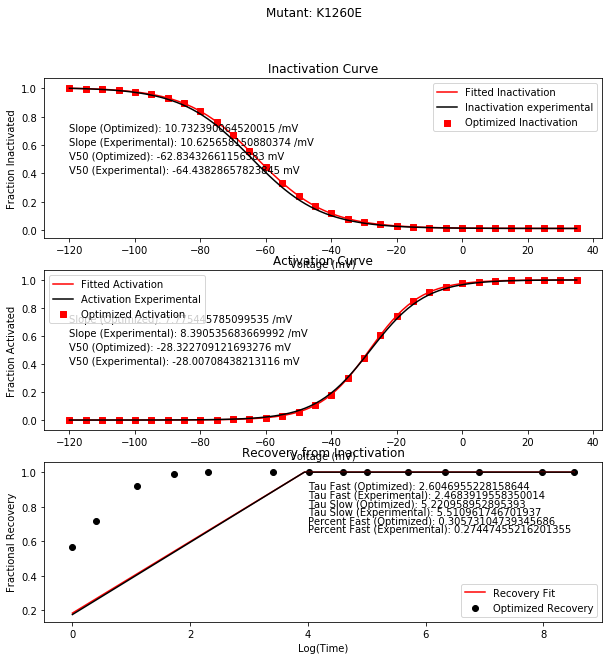

In [6]:
evaluator.plot_data(best_indvs[-1], 'K1260E')

In [13]:
best_indvs

[[228.12662686459717,
  0.21447452134949727,
  0.07915838844834006,
  0.19684044919367463,
  150.95288337587968,
  0.0762267584911977,
  2.7748833448437504,
  0.011286062023781102,
  710.2751754936714,
  0.43565803474840903,
  6.978048747230137,
  0.35348850809882454,
  7.778895137313093,
  1.5754523578233743,
  0.31032410960413537,
  4.388940043123537,
  1374.3136715830774,
  0.0633241104250692,
  5.491293261995562,
  14.125230945102771],
 [177.07877059101526,
  0.1575371711142293,
  0.10623472439675243,
  0.5502781685483232,
  88.18038962344583,
  0.1811390626890042,
  2.530917619798051,
  0.5112432241018967,
  45.58948532943745,
  0.4779115763960727,
  0.8007537916134362,
  0.14361541133753256,
  12.706046671925339,
  0.5495919568066042,
  0.3163170449594038,
  4.9192862450002846,
  74.97801530447279,
  0.05413249628010159,
  19.512310116056174,
  8.999327493949094]]

Generation: 1


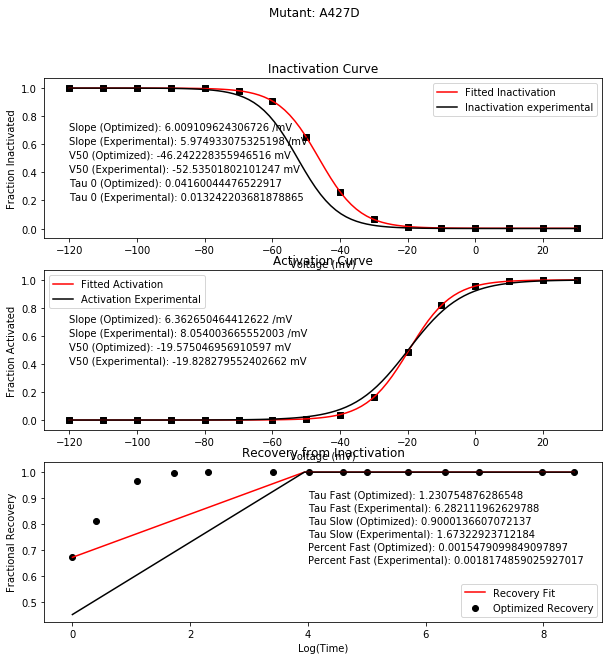

Generation: 2


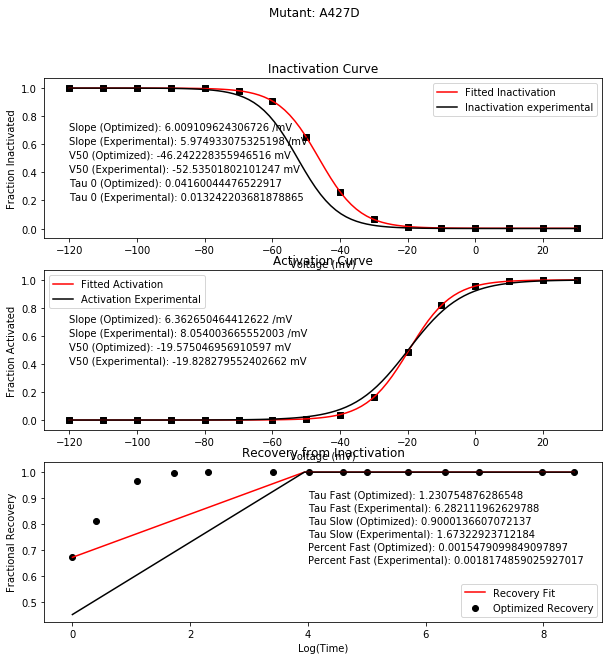

Generation: 3


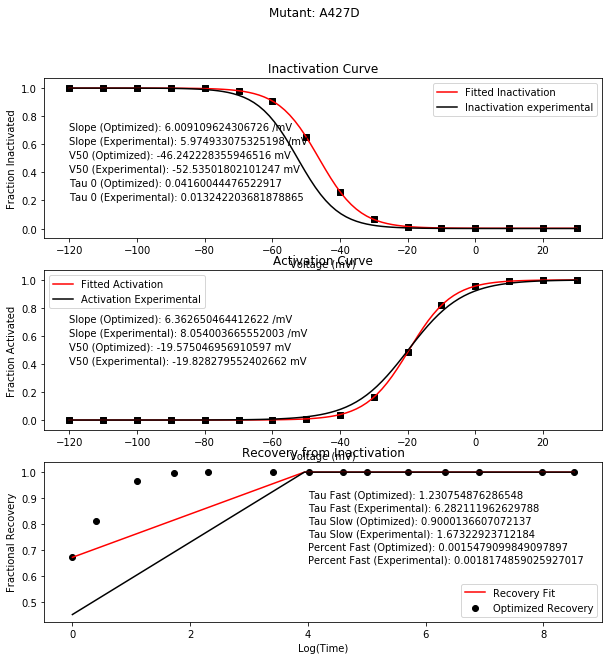

Generation: 4


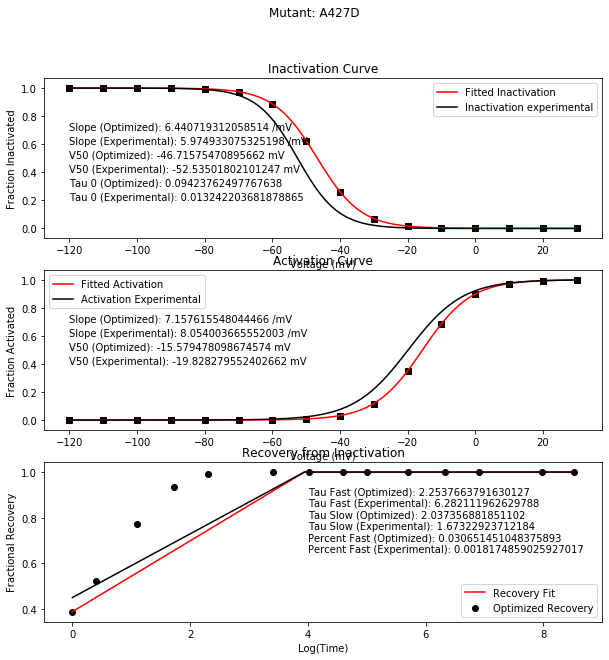

Generation: 5


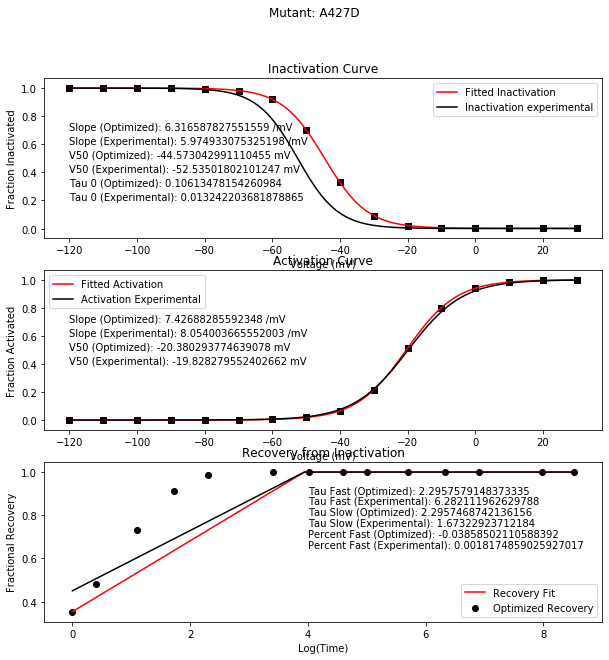

Generation: 6


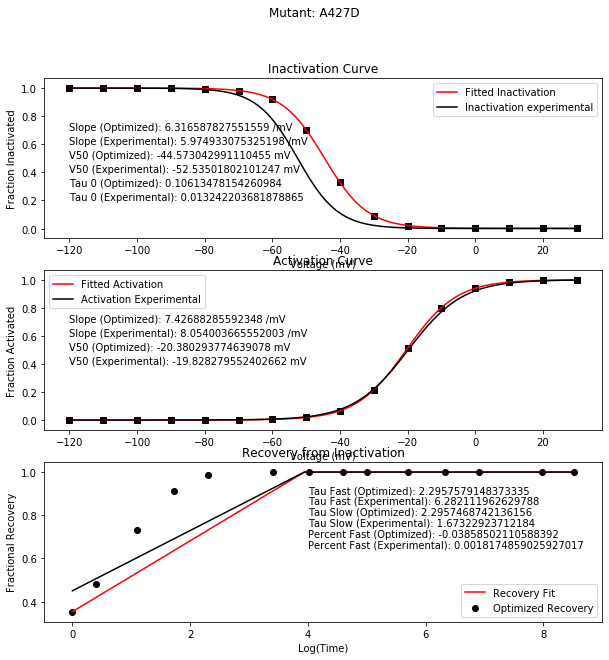

Generation: 7


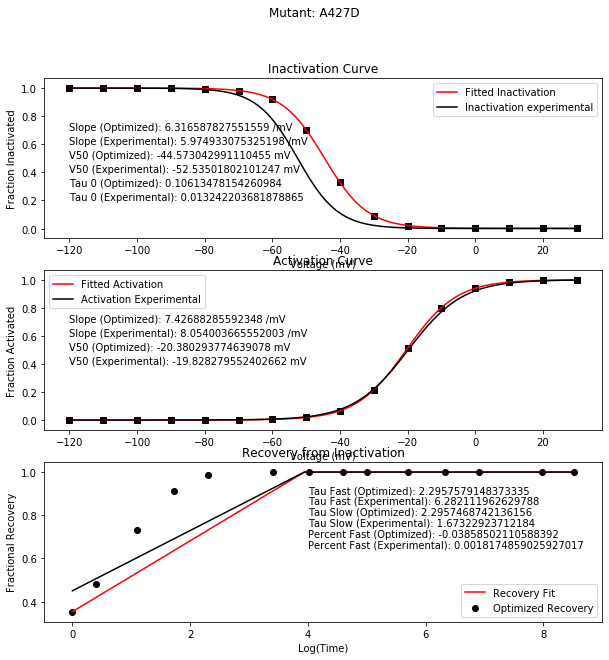

Generation: 8


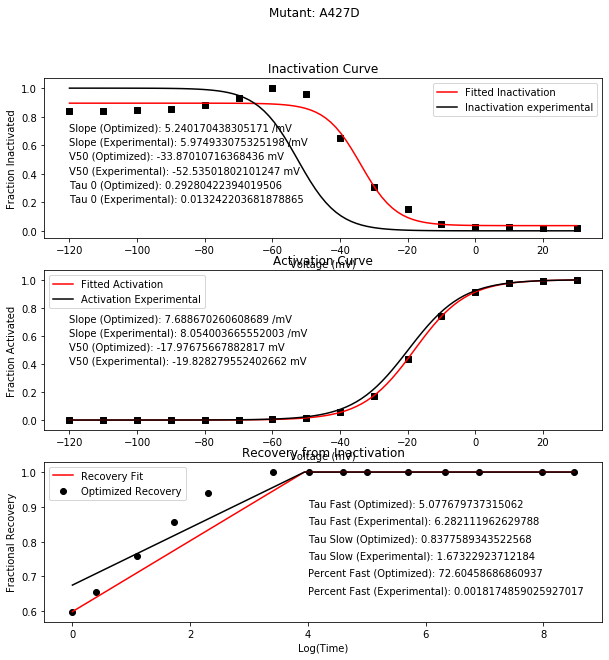

Generation: 9


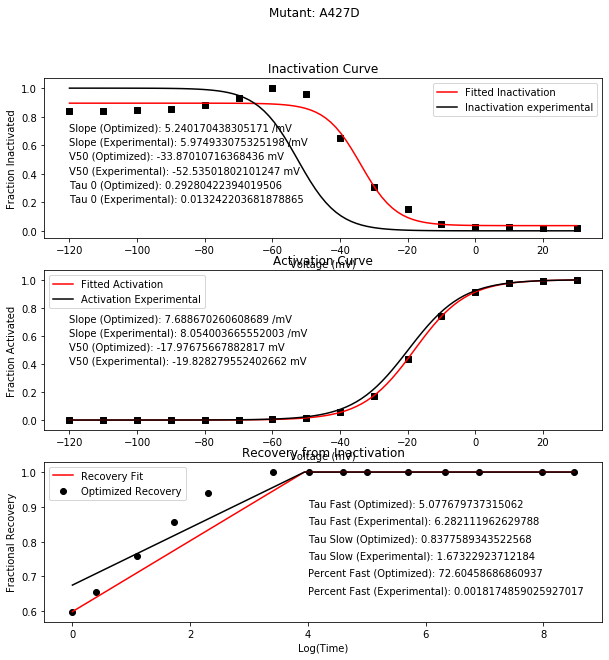

Generation: 10


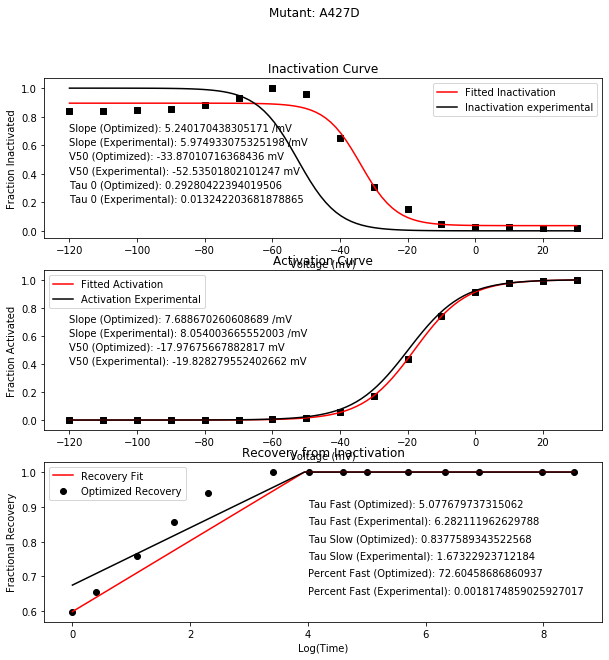

Generation: 11


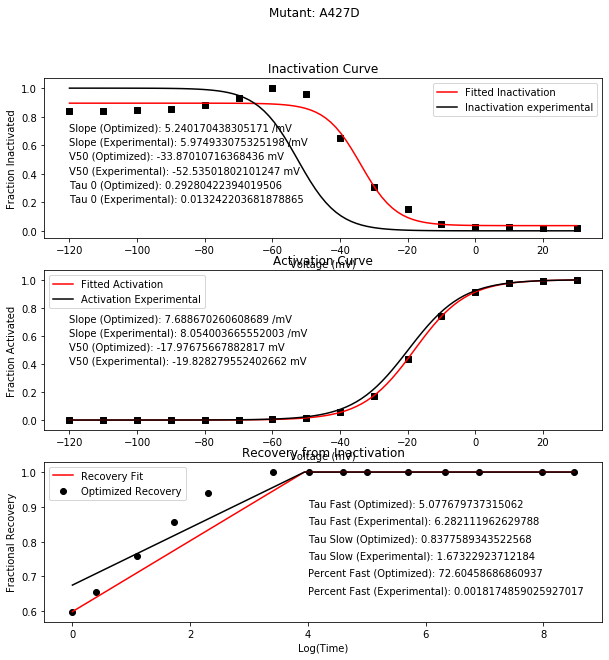

Generation: 12


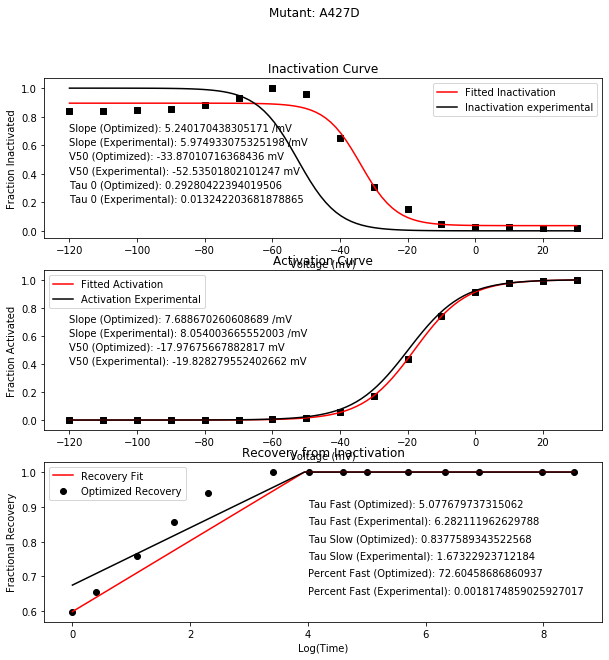

Generation: 13


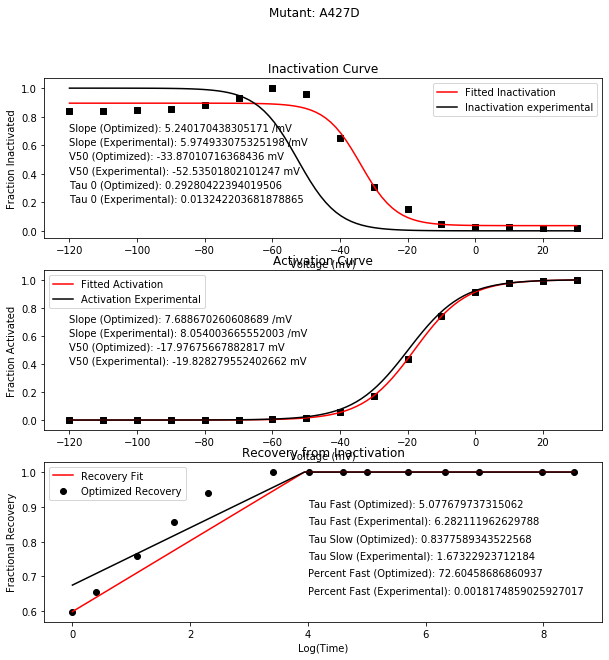

Generation: 14


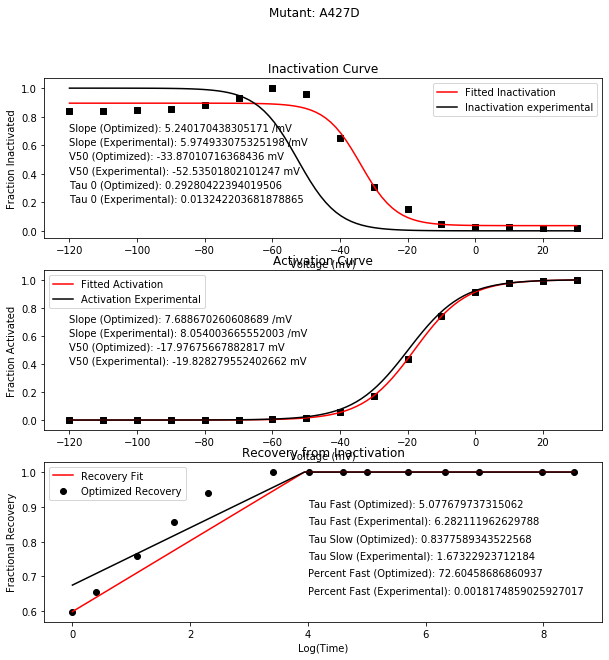

Generation: 15


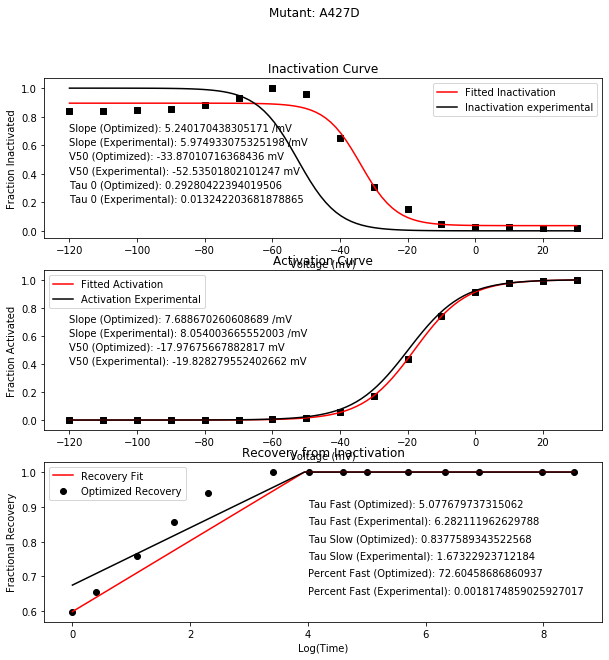

Generation: 16


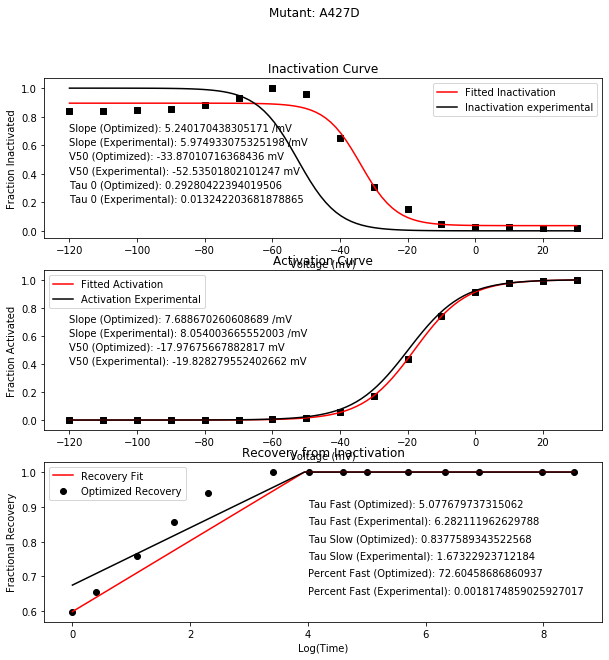

Generation: 17


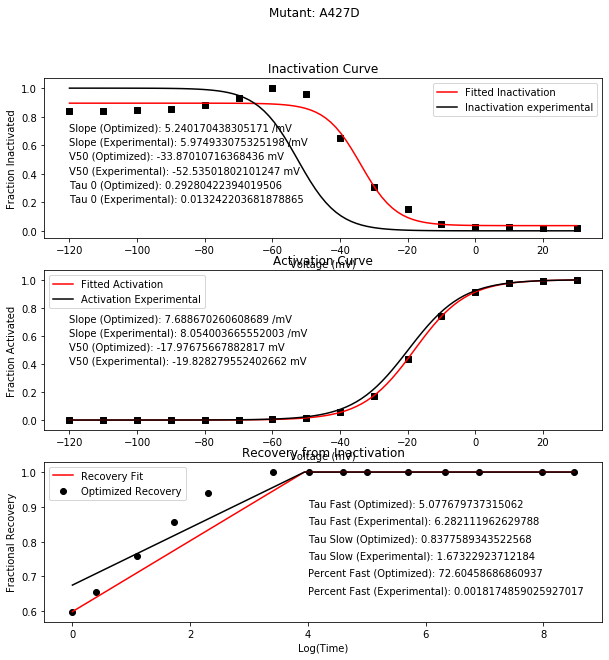

Generation: 18


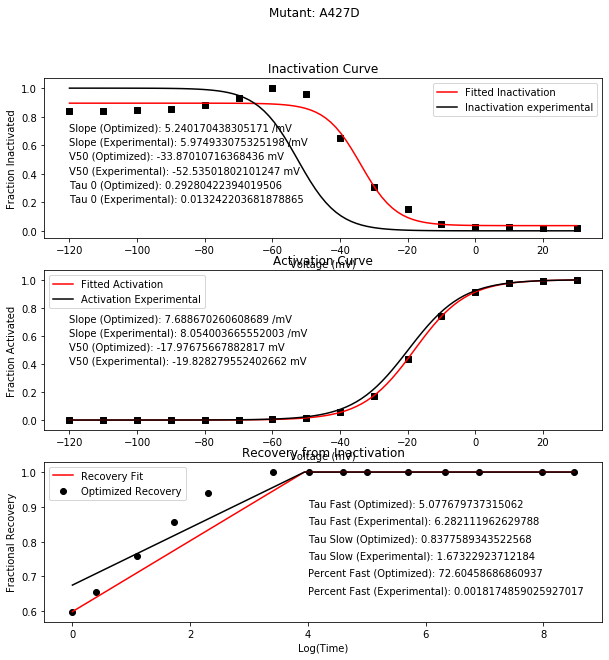

Generation: 19


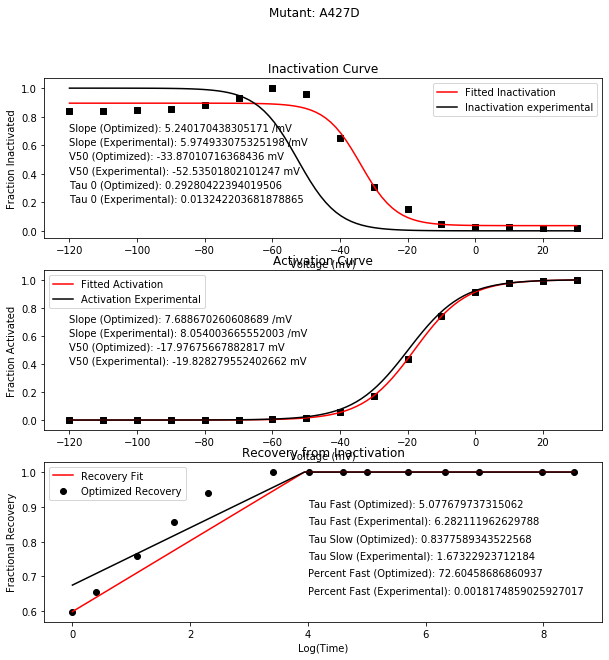

Generation: 20


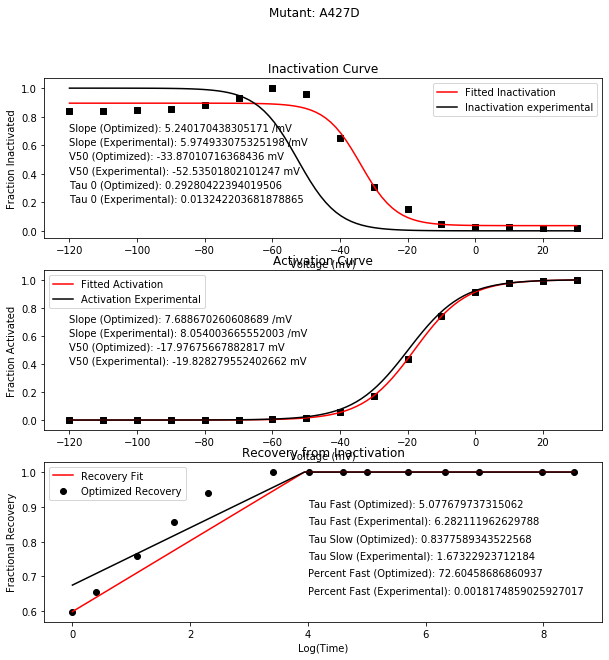

Generation: 21


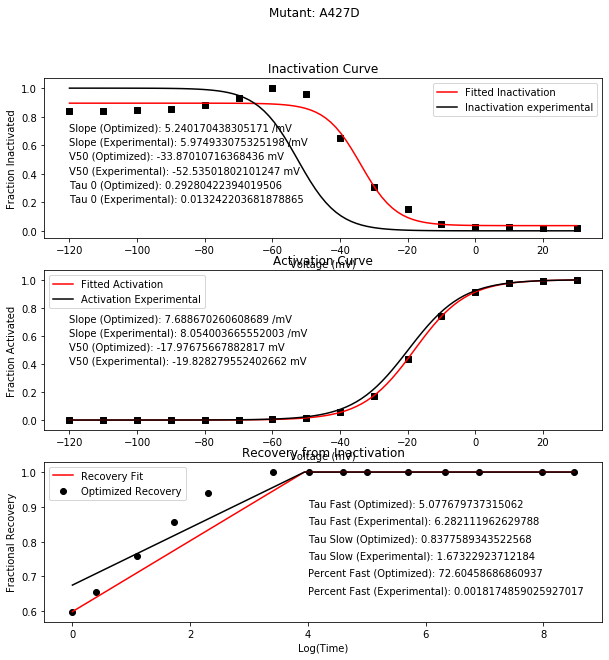

Generation: 22


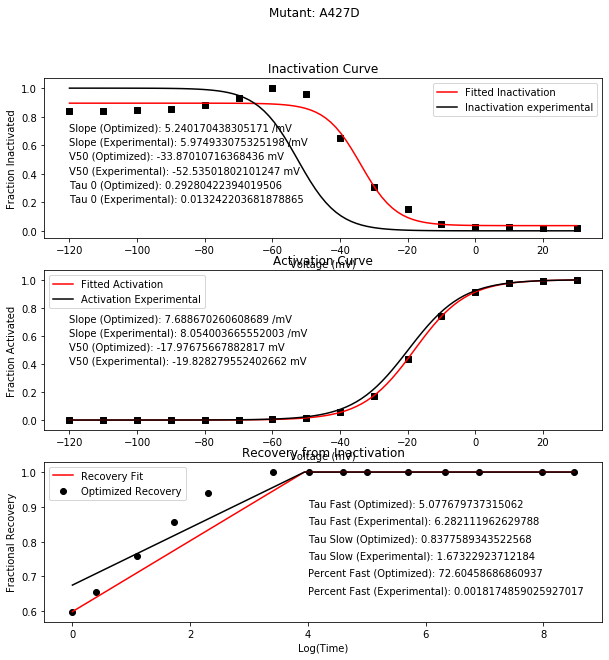

Generation: 23


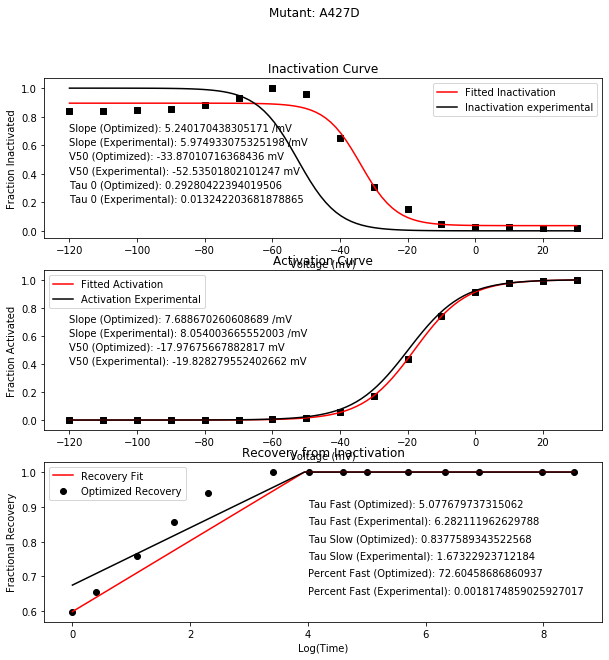

Generation: 24


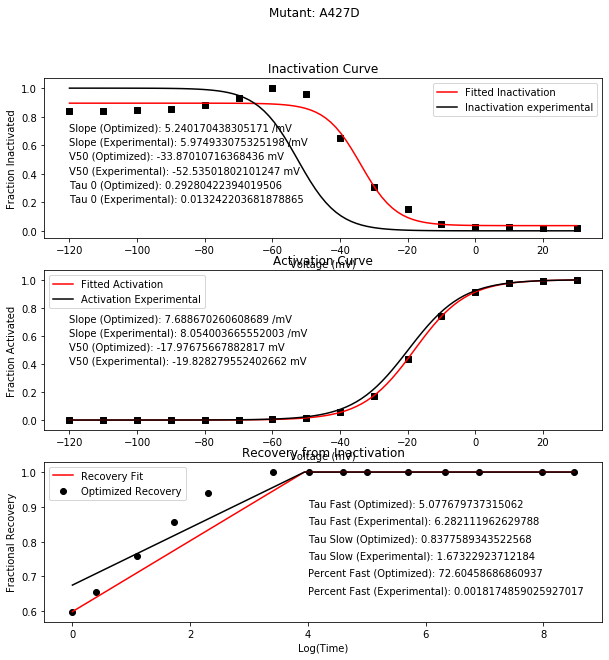

Generation: 25


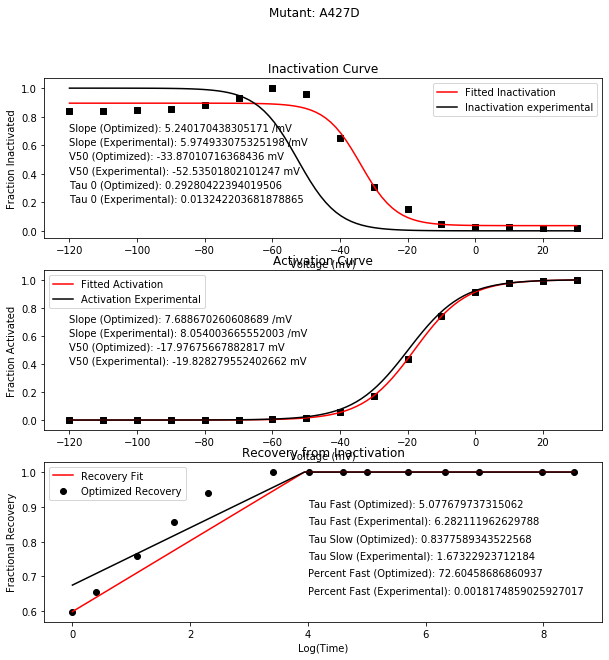

In [6]:
for i in range(1, 26):
    print('Generation: ' + str(i))
    evaluator.plot_data(best_indvs[i - 1], 'A427D')

In [1]:
x = [[329.05329639102604, 0.1606308091165473, 0.03747348501333136, 0.06526885803219298, 190.9036832318502, 0.1796721956330009, 3.1289379891044624, 0.3334967529455608, 612.3972657411969, 0.3025076706861414, 3.025676019511704, 0.1259582839920209, 7.510910096536974, 0.09873672648427731, 0.45240175567275553, 2.432778951401892, 936.167509954995, 0.0192159423779658, 7.098868873725916, 2.7656822791019575], [49.14258693986015, 0.06379311269967337, 0.12928835934449193, 0.35728356783756815, 178.51913788169645, 0.12218913898530714, 1.4330430326857246, 0.010630088530980991, 451.0203901597099, 0.35791607365034656, 2.7922869417294307, 0.12569068714912426, 19.70501066739743, 2.1216048388520674, 0.17091060192878565, 1.8316537498896295, 788.2120783433784, 0.06239596387525991, 7.165917086754051, 11.427466036120485], [49.14258693986015, 0.06379311269967337, 0.12928835934449193, 0.35728356783756815, 178.51913788169645, 0.12218913898530714, 1.4330430326857246, 0.010630088530980991, 451.0203901597099, 0.35791607365034656, 2.7922869417294307, 0.12569068714912426, 19.70501066739743, 2.1216048388520674, 0.17091060192878565, 1.8316537498896295, 788.2120783433784, 0.06239596387525991, 7.165917086754051, 11.427466036120485], [49.14258693986015, 0.06379311269967337, 0.12928835934449193, 0.35728356783756815, 178.51913788169645, 0.12218913898530714, 1.4330430326857246, 0.010630088530980991, 451.0203901597099, 0.35791607365034656, 2.7922869417294307, 0.12569068714912426, 19.70501066739743, 2.1216048388520674, 0.17091060192878565, 1.8316537498896295, 788.2120783433784, 0.06239596387525991, 7.165917086754051, 11.427466036120485], [49.14258693986015, 0.06379311269967337, 0.12928835934449193, 0.35728356783756815, 178.51913788169645, 0.12218913898530714, 1.4330430326857246, 0.010630088530980991, 451.0203901597099, 0.35791607365034656, 2.7922869417294307, 0.12569068714912426, 19.70501066739743, 2.1216048388520674, 0.17091060192878565, 1.8316537498896295, 788.2120783433784, 0.06239596387525991, 7.165917086754051, 11.427466036120485], [49.14258693986015, 0.06379311269967337, 0.12928835934449193, 0.35728356783756815, 178.51913788169645, 0.12218913898530714, 1.4330430326857246, 0.010630088530980991, 451.0203901597099, 0.35791607365034656, 2.7922869417294307, 0.12569068714912426, 19.70501066739743, 2.1216048388520674, 0.17091060192878565, 1.8316537498896295, 788.2120783433784, 0.06239596387525991, 7.165917086754051, 11.427466036120485], [49.14258693986015, 0.06379311269967337, 0.12928835934449193, 0.35728356783756815, 178.51913788169645, 0.12218913898530714, 1.4330430326857246, 0.010630088530980991, 451.0203901597099, 0.35791607365034656, 2.7922869417294307, 0.12569068714912426, 19.70501066739743, 2.1216048388520674, 0.17091060192878565, 1.8316537498896295, 788.2120783433784, 0.06239596387525991, 7.165917086754051, 11.427466036120485], [49.14258693986015, 0.06379311269967337, 0.12928835934449193, 0.35728356783756815, 178.51913788169645, 0.12218913898530714, 1.4330430326857246, 0.010630088530980991, 451.0203901597099, 0.35791607365034656, 2.7922869417294307, 0.12569068714912426, 19.70501066739743, 2.1216048388520674, 0.17091060192878565, 1.8316537498896295, 788.2120783433784, 0.06239596387525991, 7.165917086754051, 11.427466036120485], [49.14258693986015, 0.06379311269967337, 0.12928835934449193, 0.35728356783756815, 178.51913788169645, 0.12218913898530714, 1.4330430326857246, 0.010630088530980991, 451.0203901597099, 0.35791607365034656, 2.7922869417294307, 0.12569068714912426, 19.70501066739743, 2.1216048388520674, 0.17091060192878565, 1.8316537498896295, 788.2120783433784, 0.06239596387525991, 7.165917086754051, 11.427466036120485], [49.14258693986015, 0.06379311269967337, 0.12928835934449193, 0.35728356783756815, 178.51913788169645, 0.12218913898530714, 1.4330430326857246, 0.010630088530980991, 451.0203901597099, 0.35791607365034656, 2.7922869417294307, 0.12569068714912426, 19.70501066739743, 2.1216048388520674, 0.17091060192878565, 1.8316537498896295, 788.2120783433784, 0.06239596387525991, 7.165917086754051, 11.427466036120485], [49.14258693986015, 0.06379311269967337, 0.12928835934449193, 0.35728356783756815, 178.51913788169645, 0.12218913898530714, 1.4330430326857246, 0.010630088530980991, 451.0203901597099, 0.35791607365034656, 2.7922869417294307, 0.12569068714912426, 19.70501066739743, 2.1216048388520674, 0.17091060192878565, 1.8316537498896295, 788.2120783433784, 0.06239596387525991, 7.165917086754051, 11.427466036120485], [49.14258693986015, 0.06379311269967337, 0.12928835934449193, 0.35728356783756815, 178.51913788169645, 0.12218913898530714, 1.4330430326857246, 0.010630088530980991, 451.0203901597099, 0.35791607365034656, 2.7922869417294307, 0.12569068714912426, 19.70501066739743, 2.1216048388520674, 0.17091060192878565, 1.8316537498896295, 788.2120783433784, 0.06239596387525991, 7.165917086754051, 11.427466036120485], [49.14258693986015, 0.06379311269967337, 0.12928835934449193, 0.35728356783756815, 178.51913788169645, 0.12218913898530714, 1.4330430326857246, 0.010630088530980991, 451.0203901597099, 0.35791607365034656, 2.7922869417294307, 0.12569068714912426, 19.70501066739743, 2.1216048388520674, 0.17091060192878565, 1.8316537498896295, 788.2120783433784, 0.06239596387525991, 7.165917086754051, 11.427466036120485], [49.14258693986015, 0.06379311269967337, 0.12928835934449193, 0.35728356783756815, 178.51913788169645, 0.12218913898530714, 1.4330430326857246, 0.010630088530980991, 451.0203901597099, 0.35791607365034656, 2.7922869417294307, 0.12569068714912426, 19.70501066739743, 2.1216048388520674, 0.17091060192878565, 1.8316537498896295, 788.2120783433784, 0.06239596387525991, 7.165917086754051, 11.427466036120485], [49.14258693986015, 0.06379311269967337, 0.12928835934449193, 0.35728356783756815, 178.51913788169645, 0.12218913898530714, 1.4330430326857246, 0.010630088530980991, 451.0203901597099, 0.35791607365034656, 2.7922869417294307, 0.12569068714912426, 19.70501066739743, 2.1216048388520674, 0.17091060192878565, 1.8316537498896295, 788.2120783433784, 0.06239596387525991, 7.165917086754051, 11.427466036120485], [49.14258693986015, 0.06379311269967337, 0.12928835934449193, 0.35728356783756815, 178.51913788169645, 0.12218913898530714, 1.4330430326857246, 0.010630088530980991, 451.0203901597099, 0.35791607365034656, 2.7922869417294307, 0.12569068714912426, 19.70501066739743, 2.1216048388520674, 0.17091060192878565, 1.8316537498896295, 788.2120783433784, 0.06239596387525991, 7.165917086754051, 11.427466036120485], [49.14258693986015, 0.06379311269967337, 0.12928835934449193, 0.35728356783756815, 178.51913788169645, 0.12218913898530714, 1.4330430326857246, 0.010630088530980991, 451.0203901597099, 0.35791607365034656, 2.7922869417294307, 0.12569068714912426, 19.70501066739743, 2.1216048388520674, 0.17091060192878565, 1.8316537498896295, 788.2120783433784, 0.06239596387525991, 7.165917086754051, 11.427466036120485], [49.14258693986015, 0.06379311269967337, 0.12928835934449193, 0.35728356783756815, 178.51913788169645, 0.12218913898530714, 1.4330430326857246, 0.010630088530980991, 451.0203901597099, 0.35791607365034656, 2.7922869417294307, 0.12569068714912426, 19.70501066739743, 2.1216048388520674, 0.17091060192878565, 1.8316537498896295, 788.2120783433784, 0.06239596387525991, 7.165917086754051, 11.427466036120485], [49.14258693986015, 0.06379311269967337, 0.12928835934449193, 0.35728356783756815, 178.51913788169645, 0.12218913898530714, 1.4330430326857246, 0.010630088530980991, 451.0203901597099, 0.35791607365034656, 2.7922869417294307, 0.12569068714912426, 19.70501066739743, 2.1216048388520674, 0.17091060192878565, 1.8316537498896295, 788.2120783433784, 0.06239596387525991, 7.165917086754051, 11.427466036120485], [49.14258693986015, 0.06379311269967337, 0.12928835934449193, 0.35728356783756815, 178.51913788169645, 0.12218913898530714, 1.4330430326857246, 0.010630088530980991, 451.0203901597099, 0.35791607365034656, 2.7922869417294307, 0.12569068714912426, 19.70501066739743, 2.1216048388520674, 0.17091060192878565, 1.8316537498896295, 788.2120783433784, 0.06239596387525991, 7.165917086754051, 11.427466036120485]]

In [4]:
for i in range(len(x)):
    print(sum(evaluator.evaluate_with_lists(x[i])))

0.18338086461231196
15722.490058093097
15722.490058093097
15722.490058093097
15722.490058093097
15722.490058093097
15722.490058093097
15722.490058093097
15722.490058093097
15722.490058093097
15722.490058093097
15722.490058093097
15722.490058093097
15722.490058093097
15722.490058093097
15722.490058093097
15722.490058093097
15722.490058093097
15722.490058093097
15722.490058093097


In [3]:
x[3] == x[len(x) - 1]

True

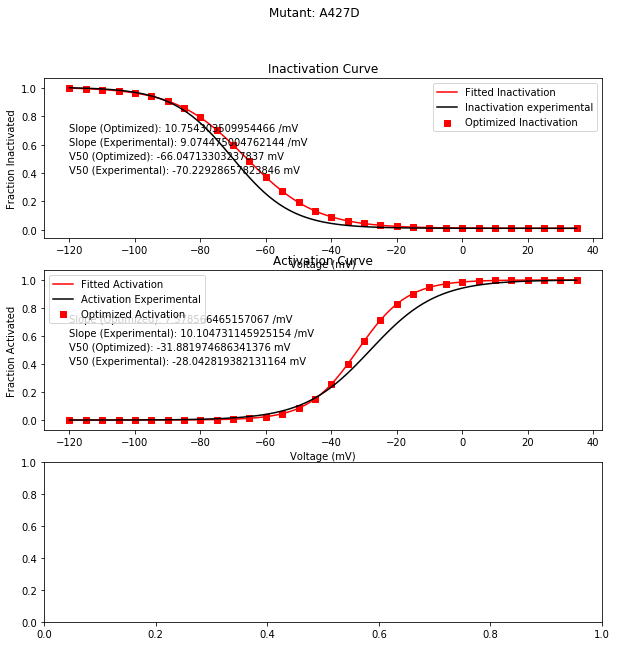

In [3]:
# Plotting some optimal values
evaluator.plot_data([180.6875979975121, 0.16823955067414018, 0.09980864886538265, 0.4824374737004963, 99.56973706764839, 0.078686789328423, 2.9338218229071766, 0.5261599250326092, 601.8364999904898, 0.09627324641022345, 1.4178074365320343, 0.250580513876519, 1.1625498949419764, 0.6285519005373086, 0.4569420383448888, 3.3231389753879226, 20.616036487873206, 0.07214671456172655, 6.257583287441859, 15.055110328650253], 'A427D')

In [2]:
evaluator = vcl_ev.Vclamp_evaluator_HMM('./params_na12mut8st.csv', 'A427D', 'na12mut8st', objective_names=['v_half_act', 'gv_slope', 'v_half_ssi', 'ssi_slope'])

/global/u1/m/mikelam/vclamp/curve_fitting.py:27: RuntimeWarning: overflow encountered in exp
  return y0 + span_fast * (1 - np.exp(-k_fast * x)) + span_slow * (1 - np.exp(-k_slow * x))


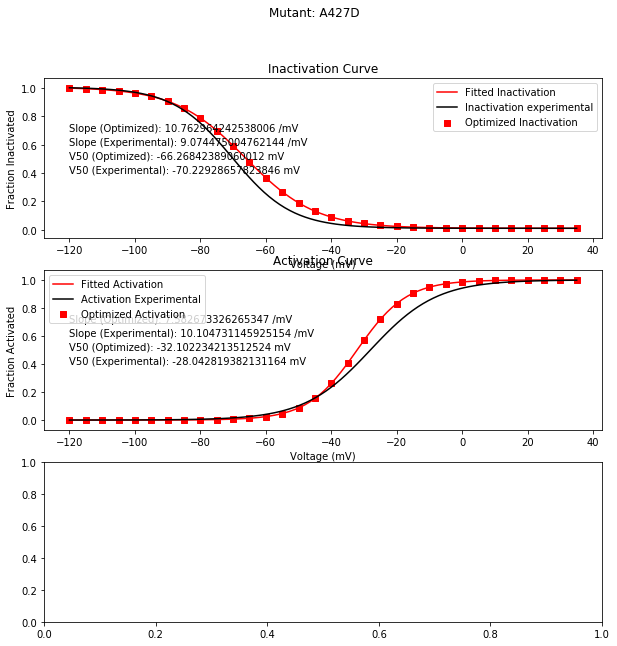

In [3]:
evaluator.plot_data([55.66805380653187, 0.19600108106576467, 0.09987174976201142, 0.8715965845899388, 114.08959587764383, 0.12690767253535756, 1.348376713486997, 0.17672226305676939, 209.11358739071602, 0.033527986165445, 1.7979339786764499, 0.16078083780150224, 24.49727938441211, 2.4953874802512344, 0.1610697569590799, 1.4503819693806173, 324.71157454508636, 0.10111975929097147, 6.0412792502831945, 13.082083702446393], 'A427D')